### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

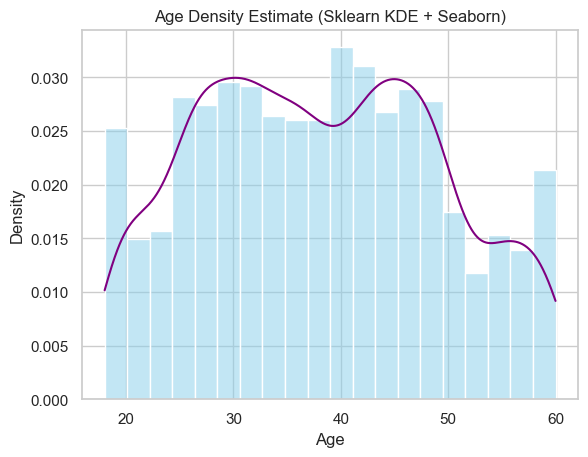

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("insurance_data.csv")

# Prepare data
age = df["age"].dropna().values.reshape(-1, 1)

# Fit KDE
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(age)

# Evaluate density
age_grid = np.linspace(df["age"].min(), df["age"].max(), 1000).reshape(-1, 1)
density = np.exp(kde.score_samples(age_grid))

# Plot
sns.set_theme(style="whitegrid")

# Histogram
sns.histplot(df["age"], bins=20, stat="density", color="skyblue", alpha=0.5)

# KDE curve
plt.plot(age_grid, density, color="purple")

plt.title("Age Density Estimate (Sklearn KDE + Seaborn)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


### Q-2: What is the probability of a patient having a BMI greater than 30?

In [2]:
insurance = pd.read_csv("insurance_data.csv")
print(len(insurance[insurance['bmi'] > 30])/len(insurance['bmi']))

0.5216417910447761


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

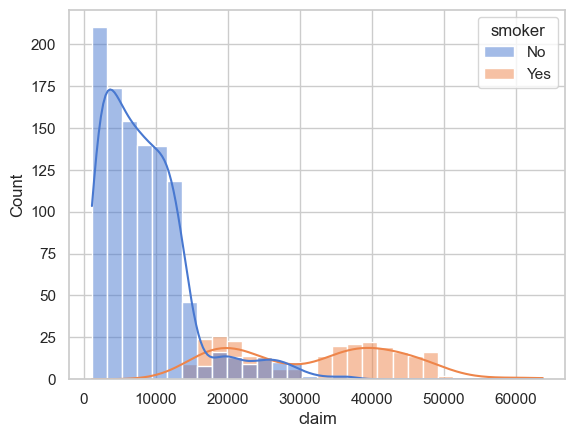

In [5]:
sns.histplot(data=insurance,x='claim',kde=True,hue='smoker',palette='muted')

* Claim for non smoker is lesser than smokers.
* Most Claims of non smokers lies in range 0-15000, and Smoker's claims are greater than 15000

### Q-3: Plot the 2D probability density plot of claim and age in the insurance dataset?

<Axes: xlabel='age', ylabel='claim'>

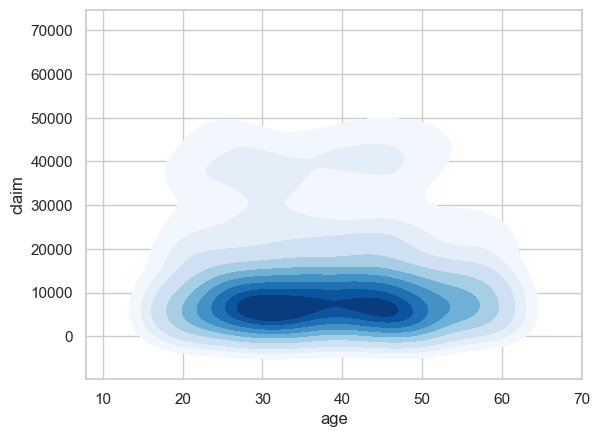

In [7]:
sns.kdeplot(data=insurance,x='age',y='claim',cmap="Blues", thresh=0.05, fill=True)

### Q-4: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

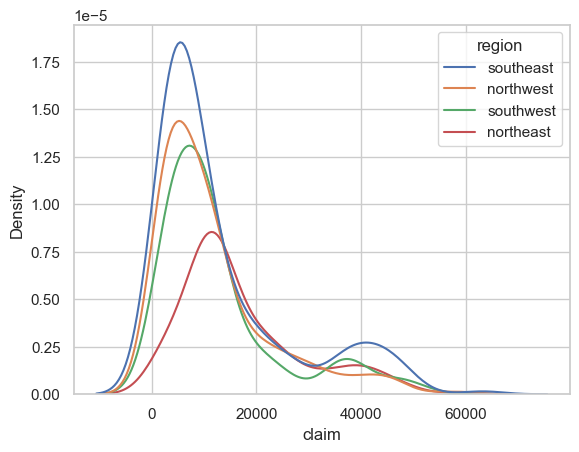

In [16]:
sns.kdeplot(data=insurance,x='claim',hue='region')

* Leaving northeast, all other regions have high density around same claim amount.
* All regions follow same trends of claims, global peak around 6000-10000 and a local peak around 4000

### Q5: Plot PDF and CDF of claim in insurance data

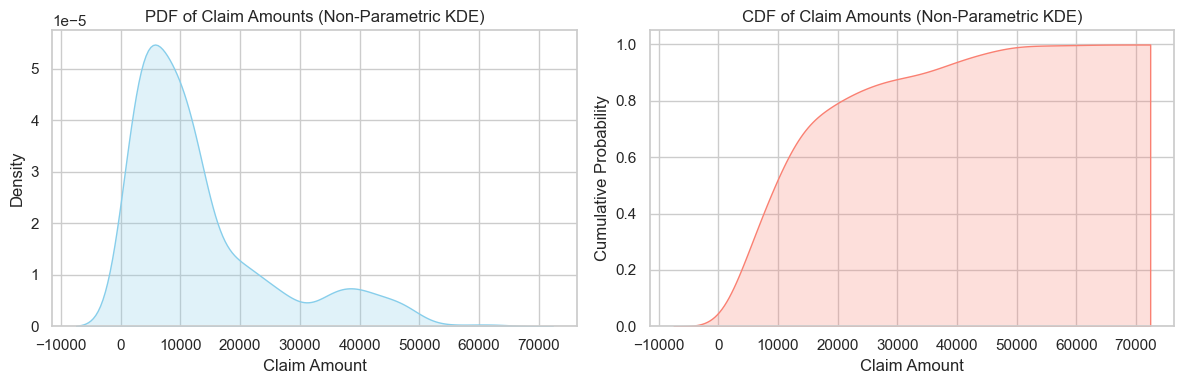

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Simulated claim data
claim_data = insurance['claim']

sns.set_theme(style="whitegrid")

# Create a single figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PDF
sns.kdeplot(
    claim_data,
    fill=True,
    color="skyblue",
    ax=axes[0]
)
axes[0].set_title("PDF of Claim Amounts (Non-Parametric KDE)")
axes[0].set_xlabel("Claim Amount")
axes[0].set_ylabel("Density")

# CDF
sns.kdeplot(
    claim_data,
    cumulative=True,
    fill=True,
    color="salmon",
    ax=axes[1]
)
axes[1].set_title("CDF of Claim Amounts (Non-Parametric KDE)")
axes[1].set_xlabel("Claim Amount")
axes[1].set_ylabel("Cumulative Probability")

# Adjust layout
plt.tight_layout()
plt.show()


### Q-6: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

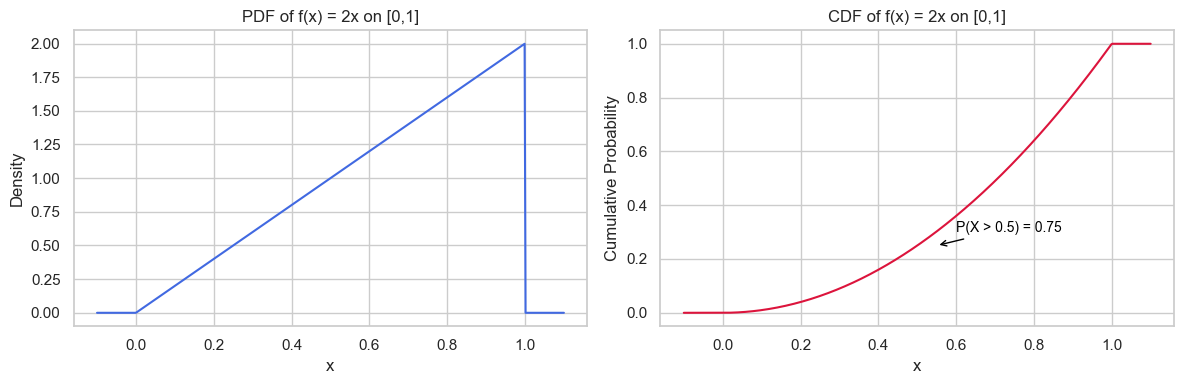

P(X > 0.5) = 0.75


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define x values from slightly outside 0-1 to show edges
x = np.linspace(-0.1, 1.1, 500)

# Compute PDF
pdf = np.where((x>=1) & (x<=1),2*x,0)

# Compute CDF
cdf = np.where(
    x < 0,
    0,
    np.where(x > 1, 1, x**2)
)

# Create DataFrame
df = pd.DataFrame({
    "x": x,
    "pdf": pdf,
    "cdf": cdf
})

# Compute probability P(X > 0.5)
p_gt_05 = 1 - (0.5)**2

sns.set_theme(style="whitegrid")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PDF plot
sns.lineplot(data=df, x="x", y="pdf", color="royalblue", ax=axes[0])
axes[0].set_title("PDF of f(x) = 2x on [0,1]")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Density")

# CDF plot
sns.lineplot(data=df, x="x", y="cdf", color="crimson", ax=axes[1])
axes[1].set_title("CDF of f(x) = 2x on [0,1]")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Cumulative Probability")

# Annotate probability on CDF plot
axes[1].annotate(
    f"P(X > 0.5) = {p_gt_05:.2f}",
    xy=(0.55, (0.5)**2),
    xytext=(0.6, 0.3),
    arrowprops=dict(arrowstyle="->", color='black'),
    fontsize=10,
    color='black'
)

plt.tight_layout()
plt.show()

# Print the result numerically
print(f"P(X > 0.5) = {p_gt_05:.2f}")


### Q-7: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

### Solution
The probability density function (PDF) of a normal distribution with mean μ and standard deviation σ is given by:

`f(x) = (1 / (σ * sqrt(2 * π))) * exp(-(x - μ)^2 / (2 * σ^2))`



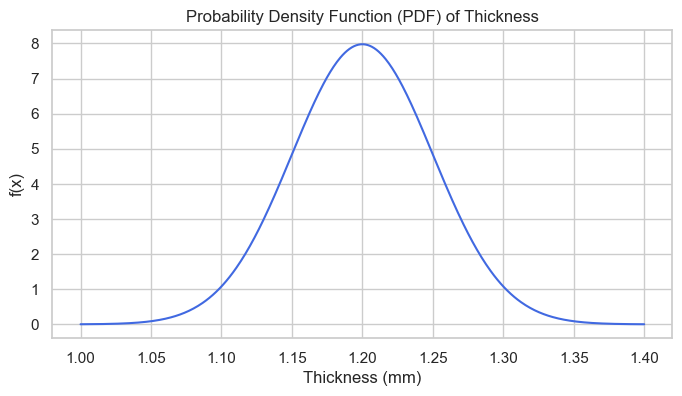

Probability that the thickness is between 1.1 mm and 1.3 mm: 0.9544997361036409


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate

# Parameters
mean = 1.2
std_dev = 0.05

# PDF function
def pdf(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

# Generate x values
x = np.linspace(1.0, 1.4, 500)

# Compute PDF
y_pdf = pdf(x, mean, std_dev)

# Put into DataFrame for seaborn
df = pd.DataFrame({
    "Thickness (mm)": x,
    "PDF": y_pdf
})

# Plot using seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,4))
sns.lineplot(data=df, x="Thickness (mm)", y="PDF", color="royalblue")
plt.title("Probability Density Function (PDF) of Thickness")
plt.ylabel("f(x)")
plt.show()

# Calculate probability between bounds
lower_bound = 1.1
upper_bound = 1.3
p_between_1_1_and_1_3 = integrate.quad(lambda x: pdf(x, mean, std_dev), lower_bound, upper_bound)[0]

print("Probability that the thickness is between 1.1 mm and 1.3 mm:", p_between_1_1_and_1_3)


[CDF of Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) : 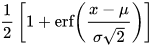

In [24]:
from scipy.stats import norm

mean = 1.2
std_dev = 0.05

result = norm.cdf(1.3, loc=mean, scale=std_dev) - norm.cdf(1.1, loc=mean, scale=std_dev)
print(result)


0.9544997361036416


In [25]:
import numpy as np
from sklearn.neighbors import KernelDensity

ages = np.random.normal(loc=40, scale=10, size=100)

# Silverman's rule approximation
sigma = np.std(ages)
n = len(ages)
h = 0.9 * sigma * n**(-1/5)

print("Recommended bandwidth:", h)

# Fit KDE with that bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(ages.reshape(-1, 1))


Recommended bandwidth: 3.6149027195186143


### Q-8 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

#### Solution:

Choosing the best bandwidth for KDE involves finding a balance between overfitting and underfitting. If the bandwidth is too small, the estimated PDF may have a lot of small, spurious oscillations or noise, which may not accurately represent the underlying distribution of the data. On the other hand, if the bandwidth is too large, the estimated PDF may be overly smooth and may not capture the finer details or variations in the data.

There are several methods that can be used to select the optimal bandwidth for KDE, including cross-validation, rule-of-thumb methods (e.g., Scott's rule, Silverman's rule), and optimization techniques (e.g., maximum likelihood estimation).

One common rule-of-thumb method for choosing the bandwidth in KDE is Scott's rule, which is given by:

`h = 1.06 * sigma * n^(-1/5)`

where `h` is the bandwidth, sigma is the standard deviation of the data, and `n` is the number of data points in the sample. Scott's rule is often used as a default bandwidth choice in many KDE implementations.

In [27]:
import numpy as np
from sklearn.neighbors import KernelDensity

ages = np.random.normal(loc=40, scale=10, size=100)

# Silverman's rule approximation
sigma = np.std(ages)
n = len(ages)
h = 0.9 * sigma * n**(-1/5)

print("Recommended bandwidth:", h)

# Fit KDE with that bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(ages.reshape(-1, 1))


Recommended bandwidth: 4.102829165180898


In [28]:
# Scott rule bandwidth
# h = 1.06 * sigma * n^(-1/5)
h = 1.06 * 10 * (100**(-1/5))
print("Scott rule bandwidth:", h)

Scott rule bandwidth: 4.219936007867071
